In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
##### numpy.random.uniform(low=0.0, high=1.0, size=None)

# Draw samples from a uniform distribution.

# Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). 
# In other words, any value within the given interval is equally likely to be drawn by uniform.

In [3]:
# 1/cm
mua = 10

# cm
delta_z = 0.025

# total photon number
photon_num = 10000

# cm
medium_thickness = 1

# max interval number which photon can travel
boundary_interval = int(medium_thickness / delta_z)
print("boundary_interval:", boundary_interval)

# Beer-Lambert Law function and generate data
def integrand(x):
    return mua*np.exp(-mua*x)
x_data = np.linspace(0.0125, 0.9875, num=40)
y_data = np.array([])
for step in range(40):
    y_data = np.append(y_data, photon_num * integrate.quad(integrand, step*delta_z, step*delta_z+delta_z)[0])

# running times
run_times = 5

boundary_interval: 40


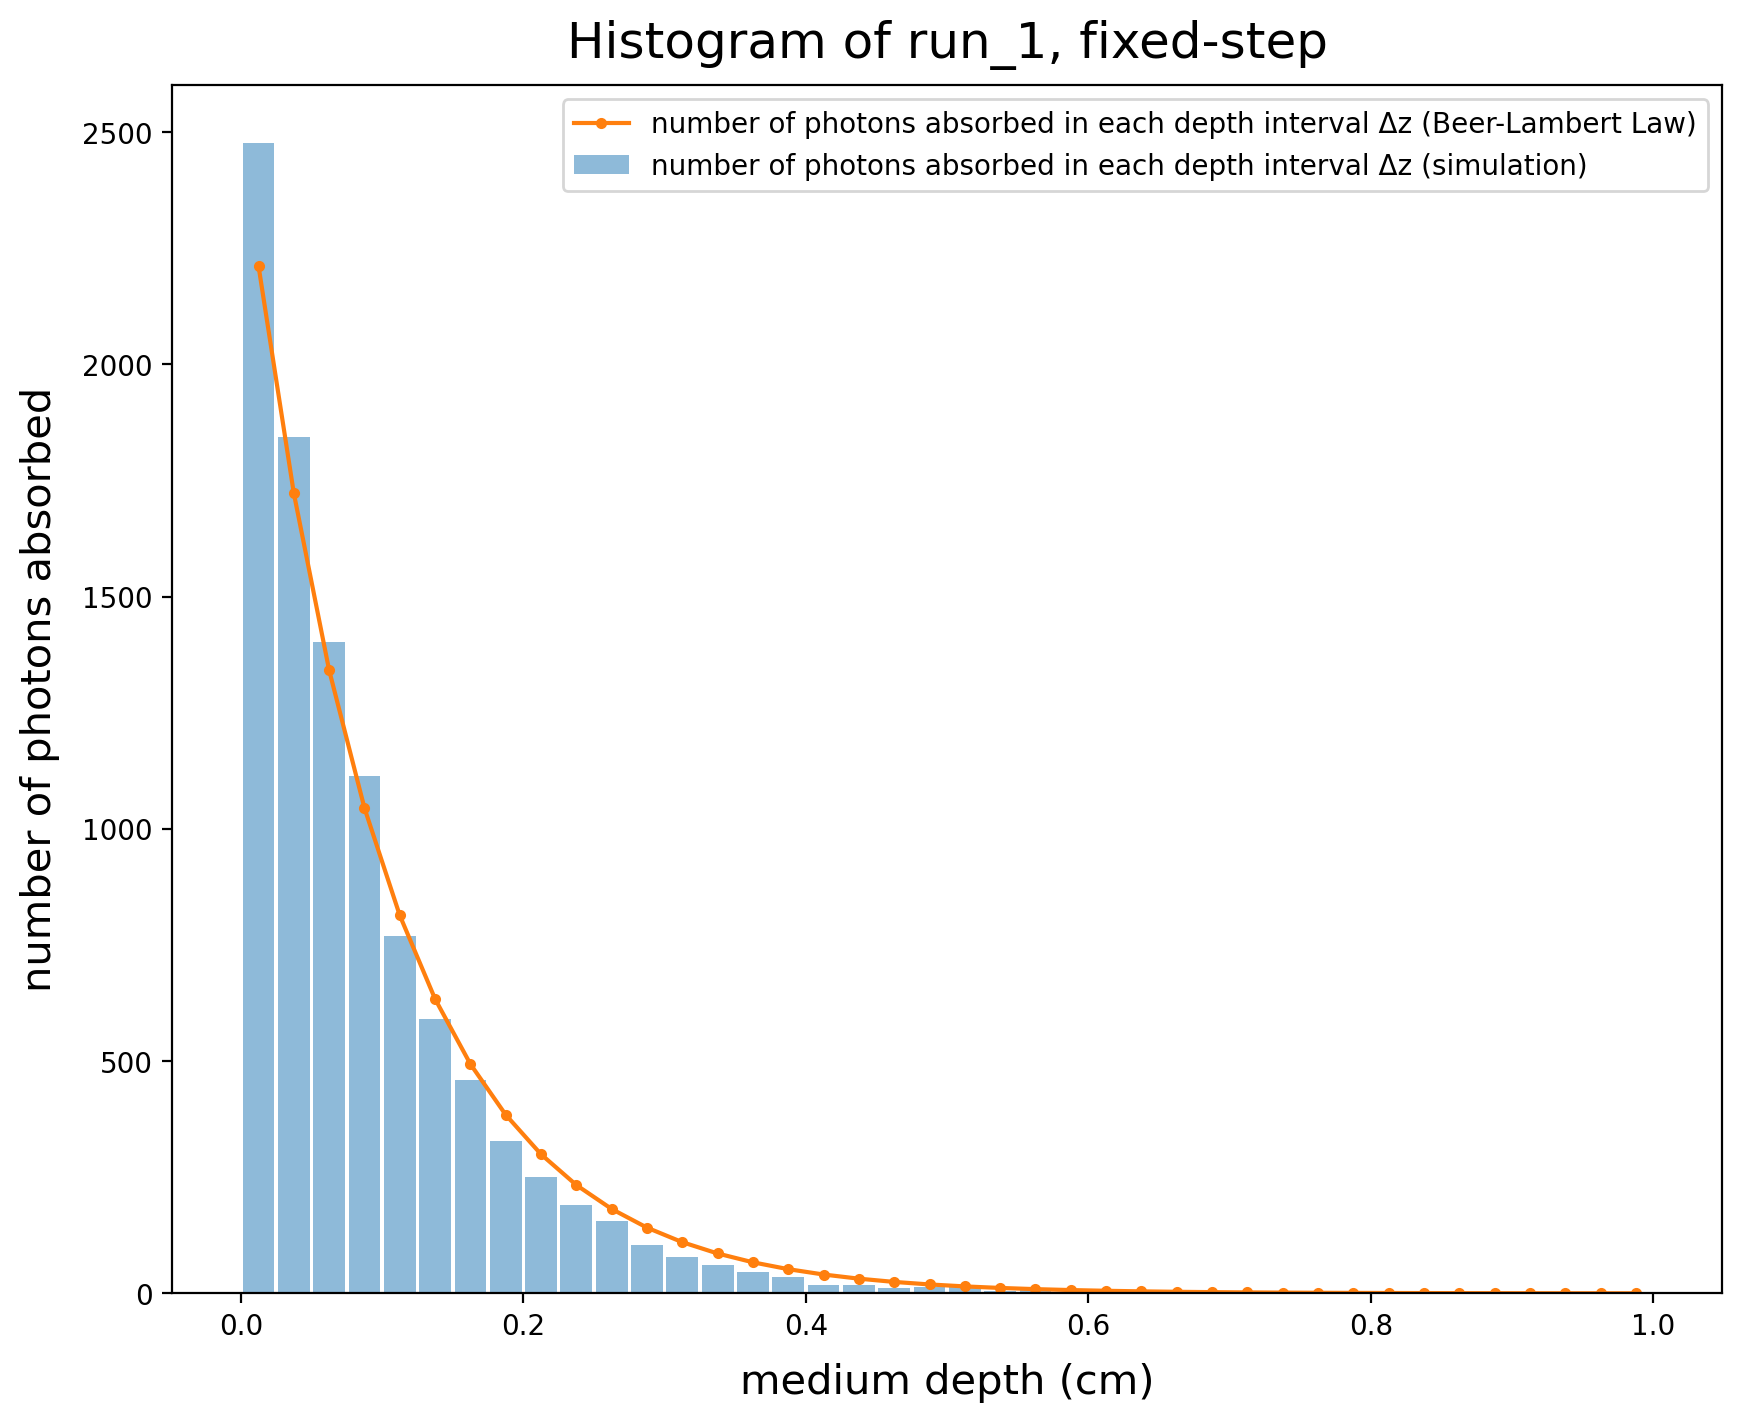

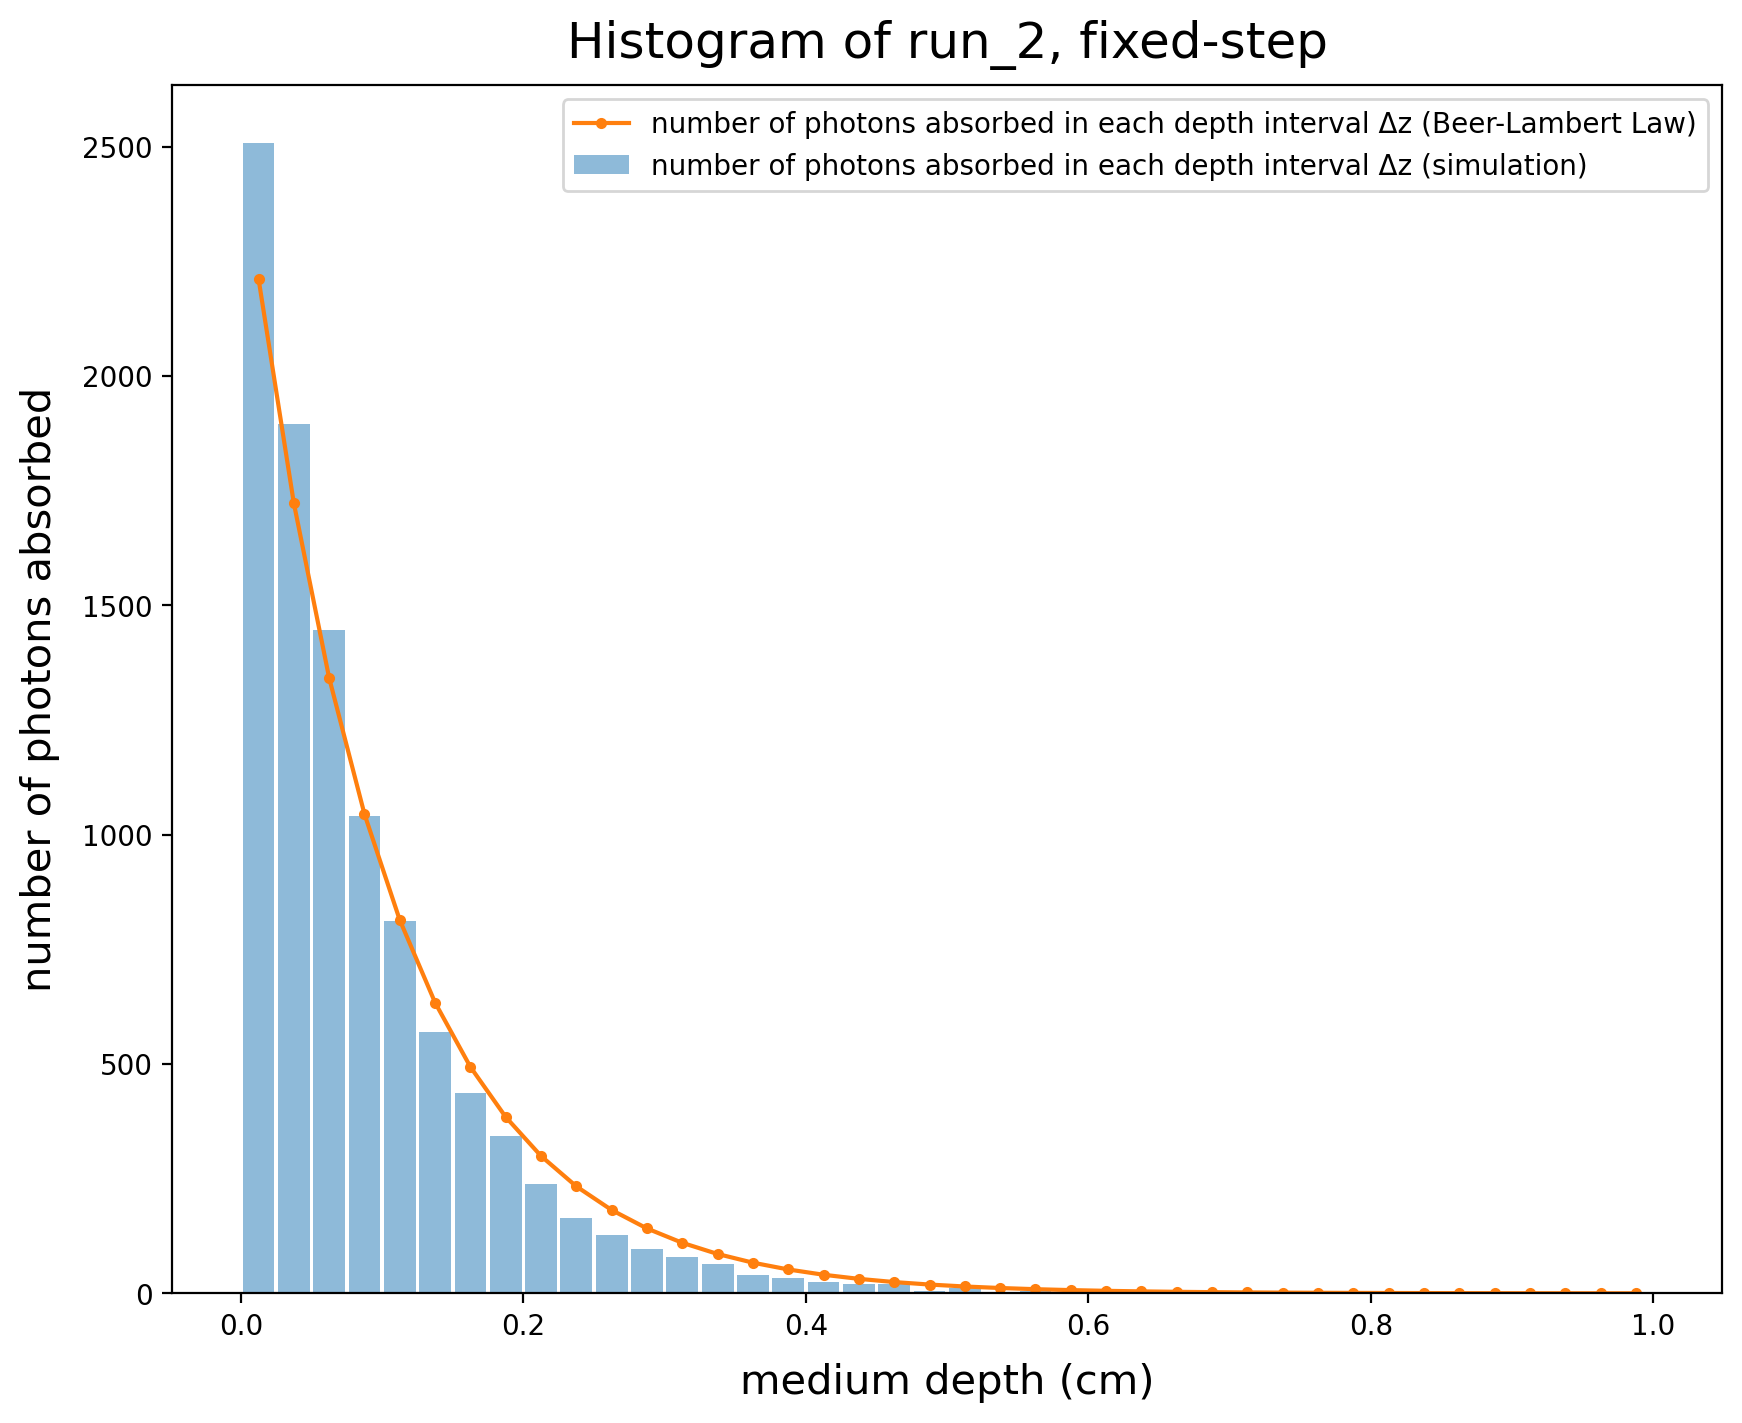

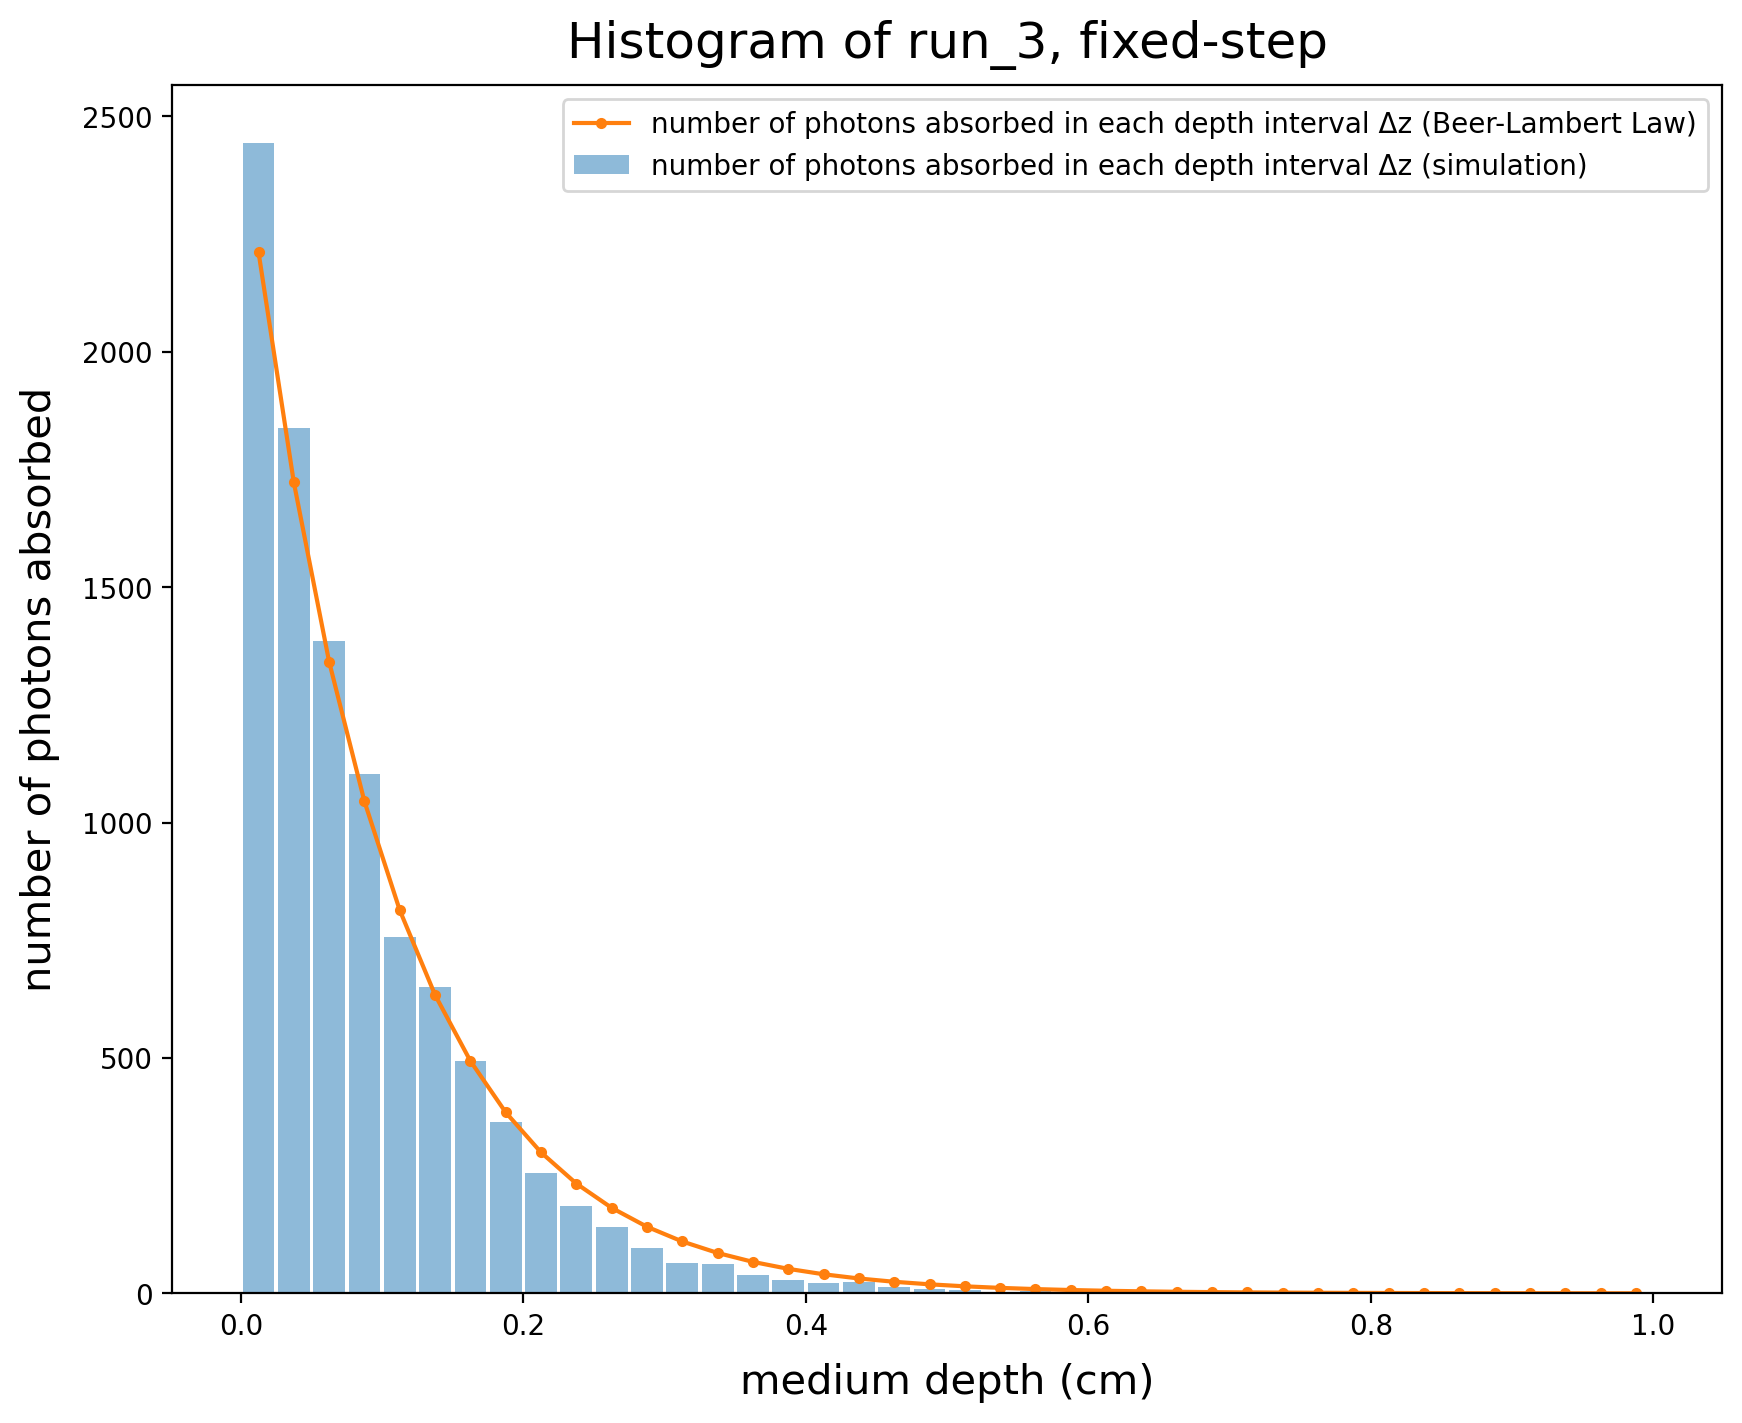

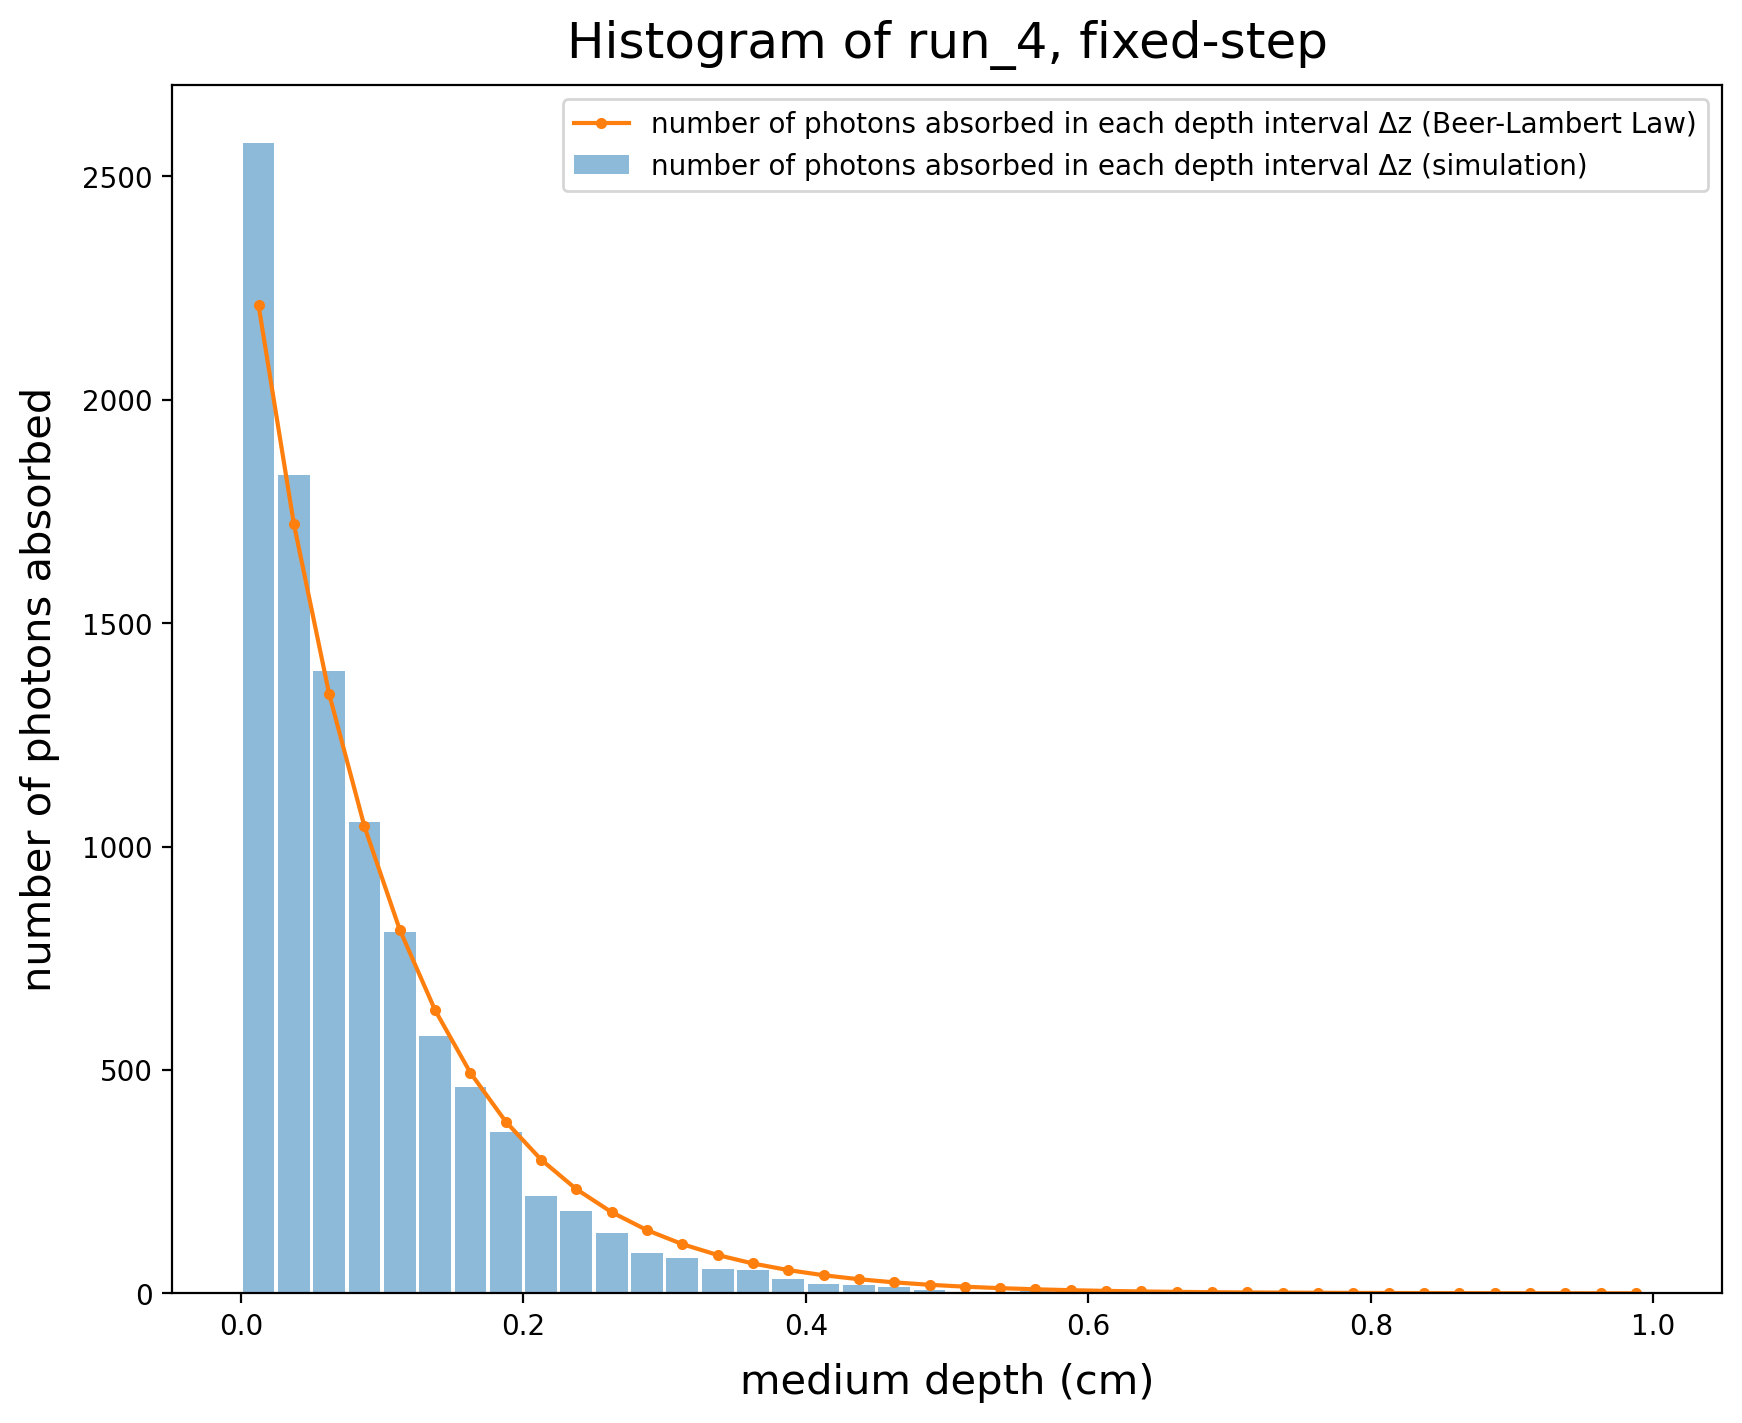

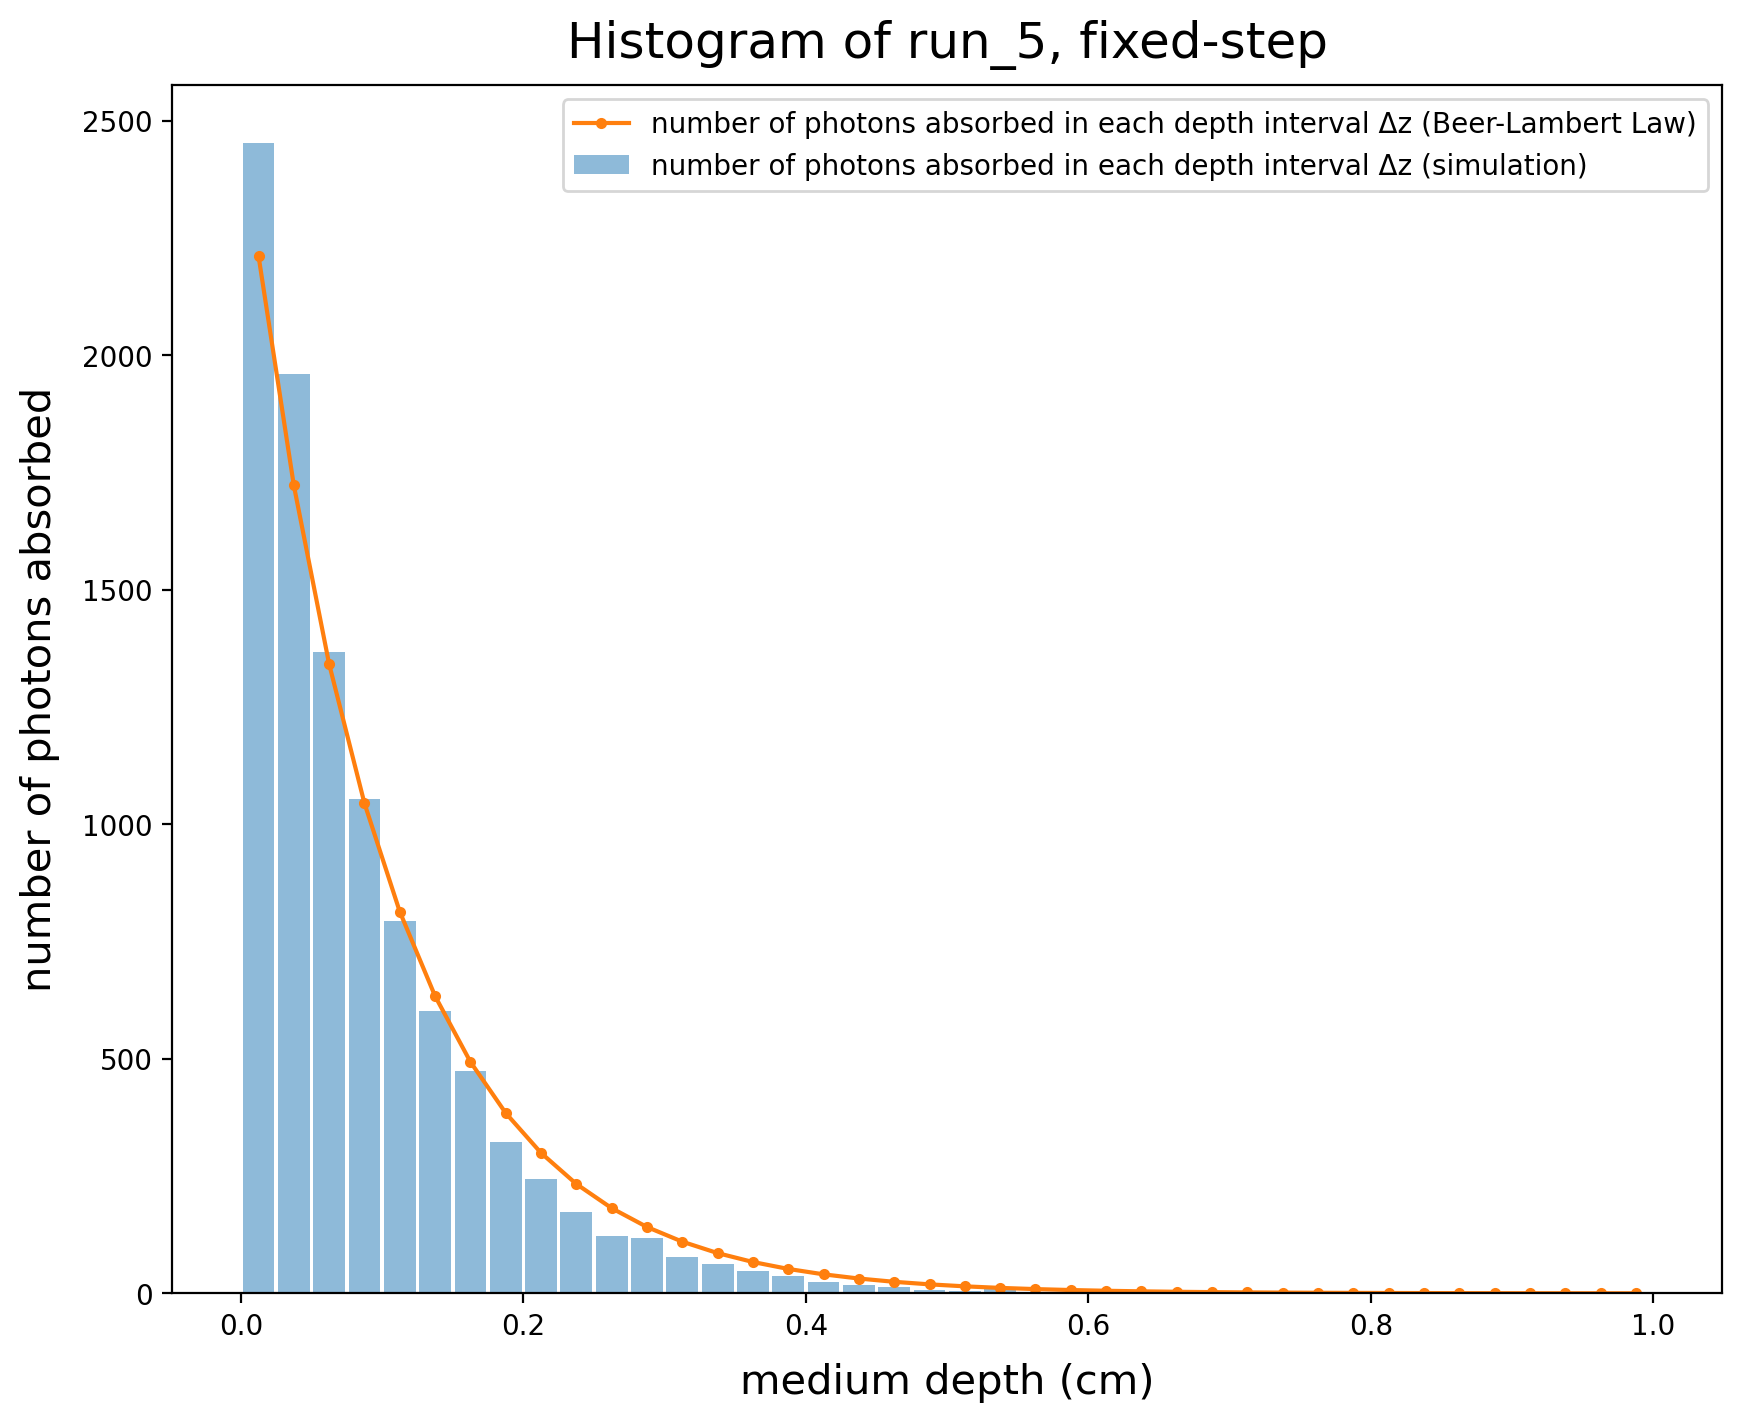

In [4]:
for run_th in range(run_times):
    
    # initialize the absorbed photon set (record absorbed position)
    absorbed_interval_recorded = np.array([], dtype=int)
    
    # start to run simulation one photon by one photon
    for photon_index in range(photon_num):
        
        # interval which photon starts to travel
        absorbed_interval = 0
        
        while True:
            absorbed_prob = np.random.uniform()
            if absorbed_prob <= mua*delta_z:
                absorbed_interval_recorded = np.append(absorbed_interval_recorded, absorbed_interval)
                break
            else:
                absorbed_interval += 1
                if absorbed_interval >= boundary_interval:
                    absorbed_interval_recorded = np.append(absorbed_interval_recorded, absorbed_interval)
                    #print("photon No.{} exceeds boundary !!".format(photon_index))
                    break

    # record the number of photons exceeding the boundary
    photon_exceed_boundary_num = np.count_nonzero(absorbed_interval_recorded>=boundary_interval)
    
    # delete the photon which travel outside the boundary
    absorbed_interval_recorded = absorbed_interval_recorded[absorbed_interval_recorded<boundary_interval]

    # transform interval_th to interval_length
    absorbed_interval_recorded = absorbed_interval_recorded * 0.025

    # plot the graph
    plt.figure(dpi=200, figsize=(10, 8))
    
    plt.hist(absorbed_interval_recorded, 
             bins=np.linspace(0, medium_thickness, num = boundary_interval+1), 
             rwidth=0.9, 
             alpha=0.5,
             label="number of photons absorbed in each depth interval \u0394z (simulation)")
    
    plt.plot(x_data, y_data, marker=".", 
             label="number of photons absorbed in each depth interval \u0394z (Beer-Lambert Law)")
    
    plt.xlabel("medium depth (cm)", fontsize=15, labelpad = 8)
    plt.ylabel("number of photons absorbed", fontsize=15, labelpad = 8)
    if photon_exceed_boundary_num > 0:
        plt.text(0.45, 1900, "{} photon(s) exceeded the boundary.".format(photon_exceed_boundary_num), fontsize=15)
    plt.legend(fontsize="medium")
    title = "Histogram of run_{}, fixed-step".format(run_th+1)
    plt.title(title, fontsize=18, pad = 10)
    plt.savefig("{}.png".format(title))
    plt.show()